# [4주차 - Day4] EDA Project

- EDA Project를 수행하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. 여러분이 선호하는 데이터셋을 선정해주세요

### DataSet
**Subject**: Red Wine Quality  
**Link**: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv

In [3]:
wine_df = pd.read_csv("./winequality-red.csv")

In [4]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. 이 데이터셋에 대한 여러 가설을 세워주세요.

### DataSet Column
**1. fixed acidity: 고정산도.**    
유지하고 있는 신맛, 시큼한 맛이며 미생물의 감염에 대한 내성을 부여한다  
**2. volatile acidity: 휘발성 산성**   
와인에서 식초 향을 내게 하며    
최대 산성은 적포도주는 0.14 g/100 mL, 백포도주의 경우 0.12 g/100 mL  
**3. citric acid: 구연산**  
와인 구조 유지에 영향을 주며, 높을 수록 신선한 상태로 오랫동안 숙성가능하다.  
**4. residual sugar: 남은 설탕**    
알코올 발효가 끝난 후 남은 천연 포도당으로 45g/L 이상이면 단맛을 낸다.  
**5. chlorides: 염화물**  
염도 또는 소금의 양이다.  
**6. free sulfur dioxide: 자유 아산화황**  
**7. total sulfur dioxide: 총 아산화황**  
아산화황은 유해물질로 생각하는 경우가 많으나,  
산도를 늦추고 유해한 박테리아를 억제하게 한다.   
보통 20-200ppm 정도이며 낮을 수록 좋다.  
**8. density: 밀도**  
바디라고도 하며 와인의 질감이 묽거나 진함을 나타낸다.  
밀도가 높다면 우유, 두유같이 목넘김이 묵직하다.  
**9. pH: 산성도**  
7보다 높으면 알칼리성, 낮으면 산성이다.  
**10. sulphates: 황산염**  
와인의 맛을 개선하고 신선도를 유지, 생동감을 준다  
**11. alcohol: 알코올**   
**12. quality: 품질**  
0~10점 사이의 점수로 데이터 제공 사이트에선  
7이상일 경우 좋음, 7미만일 경우 나쁨으로 평가할 때 유의미한 결과를 준다고 한다.

### <가설 1> 아산화황(6,7)은 퀄리티(12)에 영향을 준다.
아산화황은 산도를 늦추고 유해한 박테리아를 억제한다.  
그러나 많은 사람들은 **아산화황이 유해**하다고 생각하며,  
심지어 와인전문가들 사이에서도 **섬세한 풍미를 없앤다**고 믿는 경우가 많다.  
그래서 아산화황과 퀄리티 사이의 관계를 조사해보기로 했다.  
* 참고: https://www.decanter.com/learn/wine-terminology/sulfites-in-wine-friend-or-foe-295931/


### <가설 2> 당도(4)와 염도(5) 사이에 어떤  관계가 존재한다.
일반적으로 **음식이 짜면 설탕을 넣어 맛을 중화**시킨다.  
와인에서도 이와 비슷한 관계가 있을 것 같다.

### <가설 3> 알코올 도수(11)가 높을 수록 밀도(8)가 높다.
**와인의 도수를 확인**하면 **와인의 특징**을 알 수 있다고 한다.  
그에 대한 근거로 **알코올 도수가 높을 수록 밀도가 높다**고 하는데,  
정말 사실인지 궁금해 가설을 세워보았다.  
* 출저: https://woman.chosun.com/client/news/viw.asp?cate=C02&mcate=M1004&nNewsNumb=20201171125

### <가설 4> 단맛(4)에 영향을 주는 성분은?
와인에서 단맛은 **여러가지 요소를 통해 영향**을 받는다고 한다.  
**단맛과 다른 성분의 상관관계를 시각화**하여 어떤 성분에 영향을 받는지 분석하자.  
* 출저: https://www.decanter.com/learn/residual-sugar-46007/

## 3. 가설을 증명하기 위한 여러 데이터 분석 / 시각화를 진행해주세요.

### <가설 1> 아산화황(6,7)은 퀄리티(12)에 영향을 준다

In [5]:
wine_df["class"]  = ["Bad" if i>=7 else "Good" for i in wine_df["quality"] ]

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


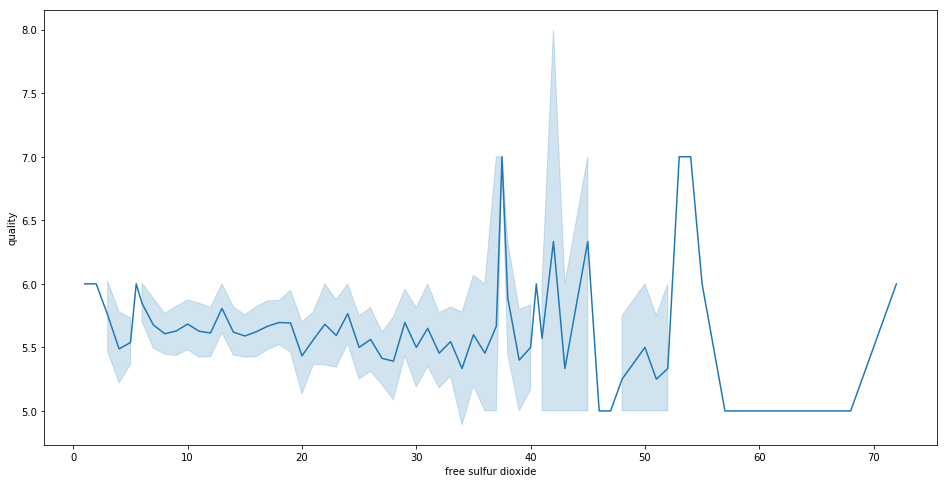

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data = wine_df, x = "free sulfur dioxide", y = "quality", ax = ax)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


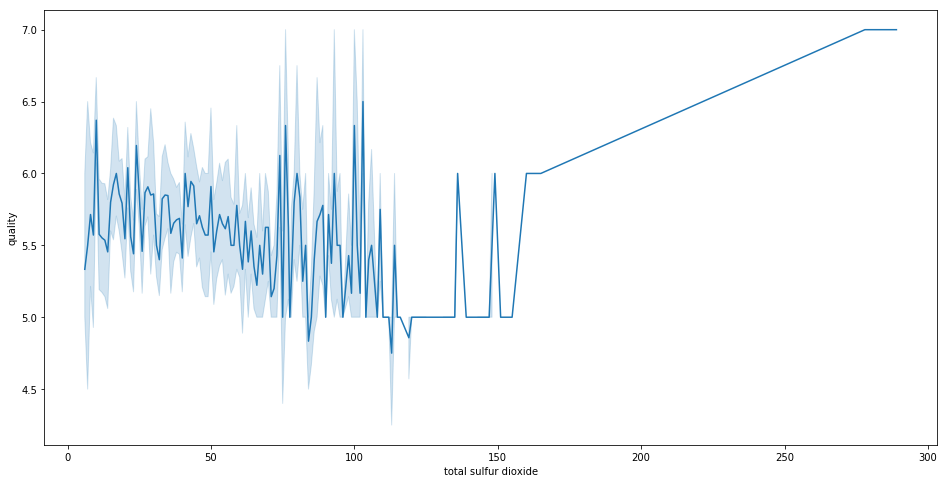

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data = wine_df, x = "total sulfur dioxide", y = "quality", ax = ax)
plt.show()

### 가설 1 결과  
- **자유 아산화황**의 경우 **30까진 품질이 떨어지는 경향**을 보이지만,  
오히려 30후반에서 40후반까지 **품질 좋은 와인과 아닌 와인이 극단적으로 분포**해있다.
- **총 아산화황**의 경우, **초반부터** 70정도까진 **품질이 떨어지는 경향**을 보이지만,  
110정도까지 극단적으로 분포하며, **심지어 더 커질수록 품질 좋은 와인이 존재**한다.
- 따라서 **아산화황이 품질에 영향을 미친다고 보긴 어렵다**고 판단 할 수 있다.

### <가설 2> 당도(4)와 염도(5) 사이에 어떤  관계가 존재한다.

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


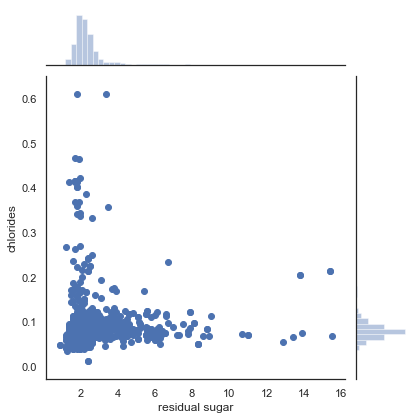

In [52]:
sns.jointplot(data=wine_df, x="residual sugar", y="chlorides")
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


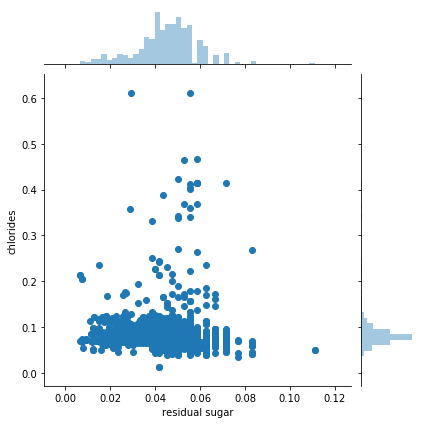

In [11]:
sns.jointplot( x=1/(10*wine_df["residual sugar"]), y=wine_df["chlorides"])
plt.show()

### 가설 2 결과  
- **극단적으로 설탕 함량이 높을 수록 염분은 덜하고, 염분도 마찬가지다.**
- 그러나 **설탕, 염분 모두 덜 한 경우가 많다.**
- 첫번째 그래프만 보면 반비례 관계처럼 보이나  
염도의 역수를 그래프로 그렸을 때 그래프에서 어떤 선형적 관계를 찾기 어려웠다. 

### <가설 3> 알코올 도수(11)가 높을 수록 밀도(8)가 높다.

그래프 x축 눈금 설정하기

In [106]:
x = sorted(wine_df["alcohol"].unique())
j= 0
for i in range(len(x)):
    if j % 5 != 0:
        x[i] = ''
    else:
        x[i] = str(x[i])
    j += 1

알코올 도수를 x, 밀도를 y축으로 하는 그래프 그리기

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


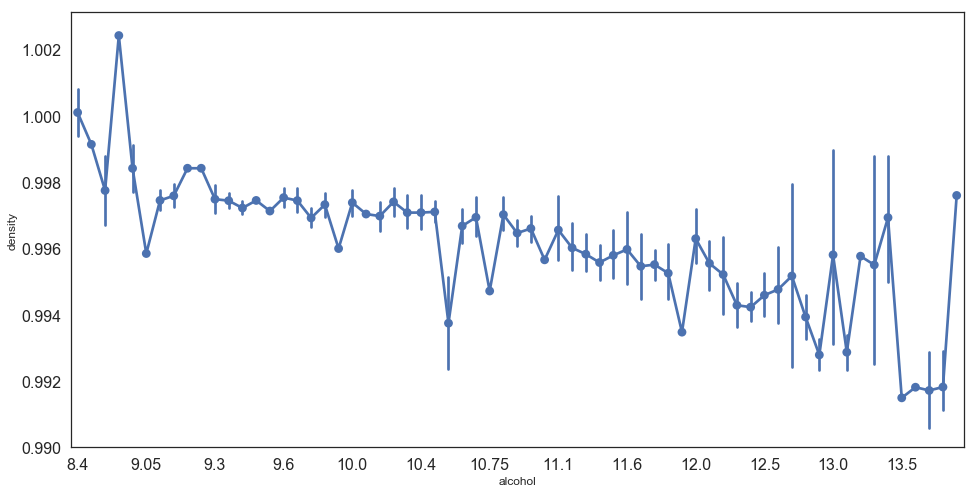

In [116]:
fig, ax = plt.subplots(figsize=(16,8))
sns.catplot(data = wine_df, x = "alcohol", y = "density", kind = "point", ax = ax)
ax.set_xticklabels(x)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.close(2)
plt.show()

### 가설 3 결과
- 알코올 도수가 높아질 수록 오히려 밀도가 낮아지는 경향을 확인 할 수 있다.

### <가설 4> 단맛(4)에 영향을 주는 성분은?

상관관계 그래프를 그린다

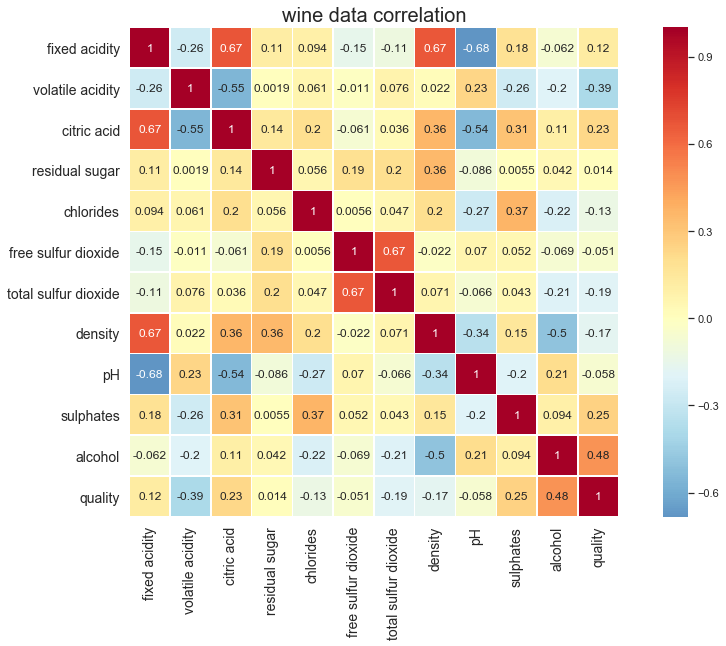

In [45]:
cor=wine_df.corr()

f,ax=plt.subplots(figsize=(16,9))
cmap=sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(cor, cmap='RdYlBu_r', 
            center=0, square=True,
            linewidths=0.5,cbar_kws={"shrink":1},annot=True)
plt.title('wine data correlation',size=20)

ax.set_xticklabels(["fixed acidity", "volatile acidity", "citric acid","residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"],size=14)
ax.set_yticklabels(["fixed acidity", "volatile acidity", "citric acid","residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"],size=14)
plt.show()

In [134]:
cor[(cor["residual sugar"] > 0.3) | (cor["residual sugar"] < -0.3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919


### 가설 4 결과
- 단맛과 관계있는 데이터는 의외로 밀도였다.